## Last Update: 01/08/2024


In [1]:
## Setup tools
import matplotlib.pyplot as plt
import numpy as np

import nengo

from nengo.dists import Uniform

Create the array to be sorted

In [2]:
# Choose two random values between 1 and 7
input_vals = np.random.randint(1,7,size=2)
larger_val = input_vals.max()
smaller_val = input_vals.min()


Create the Nengo model with neurons to perform the sorting. The input will be 2 dimensions to take in the two values. The input will connect to a second layer of neurons consisting of two different functions, one that determines which value is greater and one that determines which value is smaller. These computations are performed by training weights going into the second layer to compute the functions. Half of the neurons go toward computing the larger value, half to the smaller.

In [3]:

## Create the model object
model = nengo.Network(label="Compare")
with model:
    # Create ensembles each containing 100 leaky integrate-and-fire neurons
    input_neuron = nengo.Ensemble(500, dimensions=2, radius = 10) 
    greater_neuron = nengo.Ensemble(100, dimensions=1, radius = 15)
    smaller_neuron = nengo.Ensemble(100, dimensions=1, radius = 15)

## Create Inputs
with model:
    # Create input node representing an array of constant values
    input_array = nengo.Node(input_vals)

    # Connect input ensembles to comparator (result)
    nengo.Connection(input_array,input_neuron)

    # Create a function to return the largest value
    def greater_val(x):
        if x[0]>x[1]:
            return x[0]
        else:
            return x[1]
    
    # Create a function to return the smaller value
    def lesser_val(x):
        if x[0]<x[1]:
            return x[0]
        else:
            return x[1]
    
    # Connect input neuron to output neuron (result), train weights to return the highest value
    nengo.Connection(input_neuron, greater_neuron, function=greater_val)
    nengo.Connection(input_neuron, smaller_neuron, function=lesser_val)


Add probes to view the data along the way

In [4]:
## Add probes to view data from each ensemble and output
with model:
    input_probe = nengo.Probe(input_neuron)
    greater_probe = nengo.Probe(greater_neuron,synapse=0.01)
    smaller_probe = nengo.Probe(smaller_neuron,synapse=0.01)


Create the simulator and run the neuron dynamics over time

In [5]:
# Create the simulator
with nengo.Simulator(model) as sim:
    # Run it for 2 seconds
    sim.run(2)


Build finished in 0:00:01.                                                      
Simulation finished in 0:00:01.                                                 


Check the results

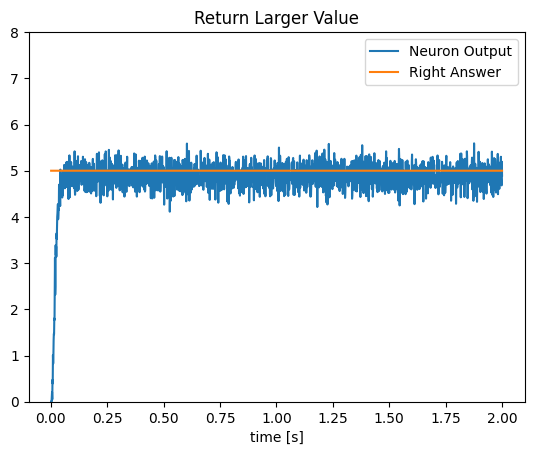

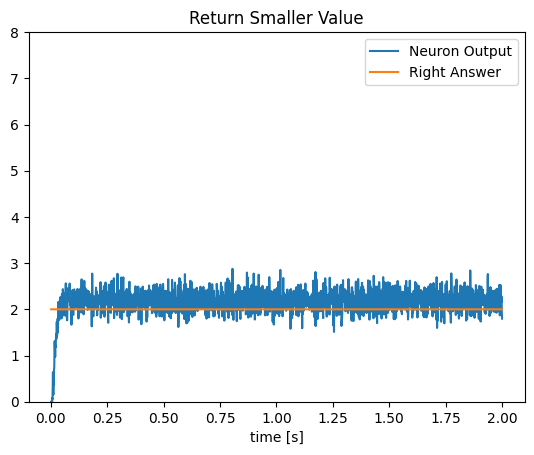

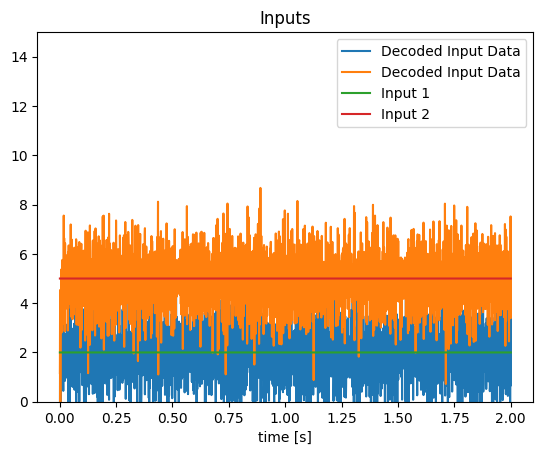

In [6]:

# set it up so that the plotted ref data is the right dimension
data_sz = sim.data[greater_probe].shape 
larger_val_arr = np.repeat(larger_val,data_sz[0])
smaller_val_arr = np.repeat(smaller_val,data_sz[0])

## Plot the results!
# Plot the input signals and decoded ensemble values
t = sim.trange()
plt.figure()
plt.plot(sim.trange(), sim.data[greater_probe], label="Neuron Output")
plt.plot(sim.trange(), larger_val_arr, label="Right Answer")
plt.legend()
plt.ylim(0, 8)
plt.xlabel("time [s]")
plt.title("Return Larger Value")
plt.show()

plt.figure()
plt.plot(sim.trange(), sim.data[smaller_probe], label="Neuron Output")
plt.plot(sim.trange(), smaller_val_arr, label="Right Answer")
plt.legend()
plt.ylim(0, 8)
plt.xlabel("time [s]")
plt.title("Return Smaller Value")
plt.show()

# set it up so that the plotted ref data is the right dimension
input_plot1 = np.repeat(input_vals[0],data_sz[0])
input_plot2 = np.repeat(input_vals[1],data_sz[0])

plt.figure()
plt.plot(sim.trange(), sim.data[input_probe], label="Decoded Input Data")
plt.plot(sim.trange(), input_plot1, label="Input 1")
plt.plot(sim.trange(), input_plot2, label="Input 2")
plt.legend()
plt.ylim(0, 15)
plt.xlabel("time [s]")
plt.title("Inputs")
plt.show()
